In [85]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from IPython.display import set_matplotlib_formats
import matplotlib.image as mpimg
import pickle
from matplotlib.animation import FuncAnimation

warnings.filterwarnings("ignore")
set_matplotlib_formats('svg')
# sns.set_style(style="darkgrid")

___
# __1. Population__

In [86]:
population = pd.read_csv("data/population.csv", index_col=0)
population.head()

,name,population,latitude,longitude
ID,,,,
0,Skarszewy,7082,54.071752,18.445995
1,Nowa Karczma,792,54.133217,18.203053
2,Lubań,1000,54.118653,18.159010
3,Będomin,150,54.123342,18.123258
4,Mały Klincz,308,54.125140,18.056115


In [87]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11524 entries, 0 to 11523
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        11524 non-null  object 
 1   population  11524 non-null  object 
 2   latitude    11524 non-null  float64
 3   longitude   11524 non-null  float64
dtypes: float64(2), object(2)
memory usage: 450.2+ KB


In [88]:
for i in range(population.shape[0]):
    row = population.iloc[i, :]
    try:
        int(row["population"])
    except:
        print("-"*20)
        print(i)
        print(row["population"])

--------------------
3210
1616 (2011 r.)
--------------------
4102
ok. 250
--------------------
9315
12 266
--------------------
10411
blisko ponad 150 osób


In [89]:
population.iloc[3210, 1] = 1616
population.iloc[4102, 1] = 250
population.iloc[9315, 1] = 12_266
population.iloc[10411, 1] = 150

In [90]:
CITIES = 50

df = \
(population
 .astype({"population": np.int32,
          "latitude":   np.float32,
          "longitude":  np.float32})
 .sort_values("population", 
              ascending=False)
 .head(CITIES)
 .copy(deep=True)
)

In [91]:
df

,name,population,latitude,longitude
ID,,,,
9844,Warszawa,1792718,52.231956,21.006725
10787,Kraków,762508,50.061947,19.936857
41,Łódź,711332,51.768734,19.456991
9767,Wrocław,634487,51.108978,17.032669
28,Poznań,548028,52.408268,16.933519
19,Gdańsk,486345,54.348289,18.654024
26,Szczecin,402465,53.430183,14.550962
37,Lublin,340466,51.250561,22.570103
75,Bydgoszcz,330038,53.121964,18.000254


___
# __2. Competition__

In [92]:
df["how_many_legoshops"] = df["name"].apply(lambda x: 2 if x=="Warszawa" else 1 if x in ["Łódź", "Wrocław", "Poznań", "Gdańsk"] else 0)

In [93]:
df = df.sort_values("population", ascending=False)
df.head()

,name,population,latitude,longitude,how_many_legoshops
ID,,,,,
9844,Warszawa,1792718,52.231956,21.006725,2
10787,Kraków,762508,50.061947,19.936857,0
41,Łódź,711332,51.768734,19.456991,1
9767,Wrocław,634487,51.108978,17.032669,1
28,Poznań,548028,52.408268,16.933519,1


___
# __3. Distance__

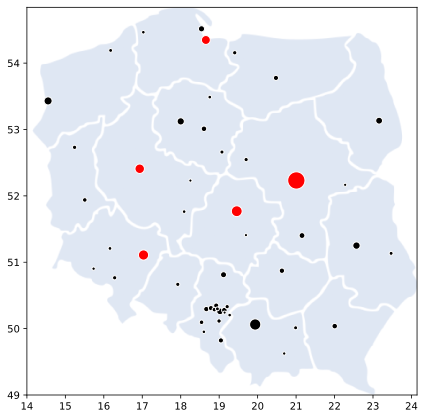

In [95]:
MAX_N, MAX_S, MAX_W, MAX_E = 54.8399, 49.0025, 14.1226, 24.1455

# scaling points based on city population
norm_pop = (df['population']-df['population'].min())/(df['population'].max()-df['population'].min())
min_size, max_size = 10, 300
scaled_sizes = min_size + (max_size - min_size) * norm_pop

# choosing points color depending if there is lego shop
point_colors = list(df["how_many_legoshops"].apply(lambda x: "red" if x>=1 else "black"))
step = 1.  # both axis tick step
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
img = plt.imread("assets/Poland.png")
plt.imshow(img, extent=[MAX_W, MAX_E, MAX_S, MAX_N], aspect="auto", alpha=.3)
plt.scatter(data=df, x="longitude", y="latitude", c=point_colors, s=scaled_sizes, 
            edgecolors='white', linewidth=1)
plt.xticks(range(14, 25))
plt.yticks(range(49, 55))
# plt.grid(True, alpha=.15, c="grey", linestyle="dashed")
with open('map.pkl', 'wb') as f:
    pickle.dump(plt.gcf(), f)
plt.show()

In [96]:
df.to_csv("data/final_data.csv")